# 01. Data Exploration: NASA C-MAPSS FD001

This notebook performs the first step of the project: loading and exploring the raw `data/CMAPSSData/train_FD001.txt` dataset.

**Goals:**
1.  Load the space-delimited text file into a `pandas` DataFrame.
2.  Assign the correct column names based on the `data/CMAPSSData/readme.txt`.
3.  Perform initial verification (check shape, dtypes, null values).
4.  Visualize the run-to-failure nature of the data.

**Note:**

Even though the repository contains the full NASA CMAPSS turbofan dataset (`FD001`–`FD004`), the pipeline for this first version is implemented on **FD001** only.

- FD001 has a single operating condition and a single fault mode, which makes it easier to analyze and explain.
- It still contains enough engines and cycles to train a robust anomaly detector.
- The remaining subsets (FD002–FD004) are intentionally left as future extensions: the same pipeline can be reused with minor changes to handle multiple operating conditions and fault modes.

In [30]:
# 0. Imports and plotting configuration

from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make repo root importable
repo_root = Path("..").resolve()
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from src.config import TRAIN_FD001_PATH, COLS

# Seaborn + matplotlib global style
sns.set_theme(style='whitegrid', context='notebook')

# Reasonable default figure size
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 120

## 1. Data Loading and Column Naming

Based on the `readme.txt`, the data is space-delimited and has no header. It contains 26 columns:
* `unit_number`
* `time_in_cycles`
* 3 operational settings (`op_setting_1` to `3`)
* 21 sensor readings (`sensor_1` to `21`)

We will define these column names and use them to load the data.

In [31]:
# 1. Data loading and column naming

DATA_PATH = TRAIN_FD001_PATH

if not DATA_PATH.exists():
    raise FileNotFoundError(
        f"Data file not found at {DATA_PATH}. "
        "See README.md for Dataset download instructions."
    )

# Use a whitespace regex separator for space-delimited data
df = pd.read_csv(
    DATA_PATH,
    sep=r'\s+',
    header=None,
    names=COLS
)

## 2. Initial Data Verification

We will check the first few rows, the data types, and the null value counts to ensure the data was loaded correctly.

In [32]:
# 2. Initial data verification

print("--- Data shape ---")
print(df.shape)

print("\n--- Data head ---")
df.head()

--- Data shape ---
(20631, 26)

--- Data head ---


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [33]:
print("\n--- Data info ---")
df.info()


--- Data info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   sensor_1        20631 non-null  float64
 6   sensor_2        20631 non-null  float64
 7   sensor_3        20631 non-null  float64
 8   sensor_4        20631 non-null  float64
 9   sensor_5        20631 non-null  float64
 10  sensor_6        20631 non-null  float64
 11  sensor_7        20631 non-null  float64
 12  sensor_8        20631 non-null  float64
 13  sensor_9        20631 non-null  float64
 14  sensor_10       20631 non-null  float64
 15  sensor_11       20631 non-null  float64
 16  sensor_12       20631 non-null  float64
 17  sensor_13   

In [34]:
total_missing = df.isna().sum().sum()
print(f"\nTotal missing values: {total_missing}")


Total missing values: 0


In [35]:
print("\n--- Descriptive statistics ---")
df.describe().T # Transposed for a more readable orientation


--- Descriptive statistics ---


,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [36]:
# Identify contant (zero-variance) columns, which will be dropped later in preprocessing

nunique = df.nunique()
constant_columns = nunique[nunique <=1].index.to_list()

print("\n--- Constant columns (nunique <= 1) ---")
print(constant_columns)


--- Constant columns (nunique <= 1) ---
['op_setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']


## 3. Exploratory Visualization (Run-to-Failure)

The `data/CMAPSSData/readme.txt` file states this dataset is "run-to-failure." Let's verify this by plotting the `time_in_cycles` for a few sample engines (e.g., the first 5 units). We expect to see that each engine `unit_number` has a different total lifespan.

In [37]:
# Compute engine lifespan as the maximum cycle per unit

lifespans_df = (
    df.groupby("unit_number", as_index=False)["time_in_cycles"]
    .max()
    .rename(columns={"time_in_cycles":"max_time_in_cycles"})
)

print("\n--- Engine lifespans (first 10 units) ---")


print(f"max_time_in_cycles: {lifespans_df.max_time_in_cycles.max()}")
print(f"min_time_in_cycles: {lifespans_df.max_time_in_cycles.min()}")
lifespans_df.head(10)


--- Engine lifespans (first 10 units) ---
max_time_in_cycles: 362
min_time_in_cycles: 128


,unit_number,max_time_in_cycles
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
5,6,188
6,7,259
7,8,150
8,9,201
9,10,222


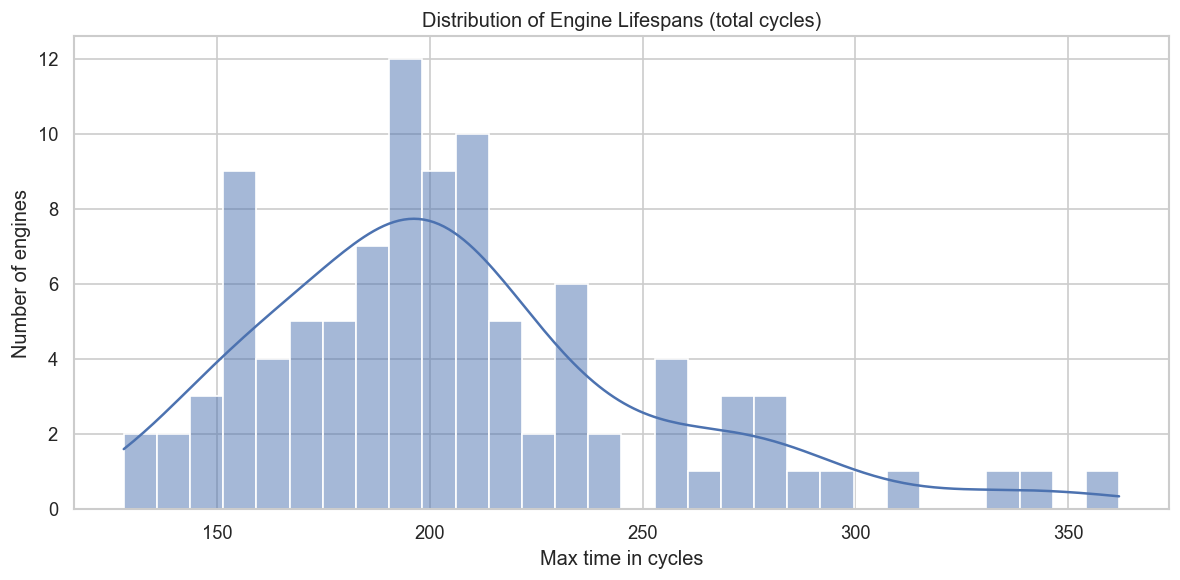

In [38]:
# Plot distribution of engine lifespans

fig, ax = plt.subplots()

sns.histplot(
    data=lifespans_df,
    x="max_time_in_cycles",
    bins=30,
    kde=True,
    ax=ax,
)

ax.set(
    title="Distribution of Engine Lifespans (total cycles)",
    xlabel="Max time in cycles",
    ylabel="Number of engines"
)

fig.tight_layout()
plt.show()

### Observations:

* The data loaded successfully. We have 20 631 rows, 26 columns, and no null values.
* The `df.describe()` and `nunique` show that some sensors 1, 5, 6, 10, 16, 18, and 19 are constant. These zero-variance sensors will be dropped during preprocessing.
* The histogram above confirms the run-to-failure nature. The dataset contains 100 unique engines, and their lifespans range from 128 to 362 cycles, with considerable variation across engines.

We are ready to move on to preprocessing.